# MNIST Dataset: Linear Classifiers

## Read in data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os, sys
import numpy as np
from sklearn.svm import LinearSVC, SVC
from scipy.stats import multivariate_normal

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

## Linear SVM

In [16]:
def train_linear_svm(C = np.geomspace(0.001, 100, 10)):

    train_errors = np.zeros_like(C)
    test_errors = np.zeros_like(C)
    
    # train classifiers
    for index in range(len(C)):
        clf = LinearSVC(loss='hinge', C=C[index])
        clf.fit(train_data, train_labels)
        
        test_predictions = clf.predict(test_data)
        train_predictions = clf.predict(train_data)
        
        test_error_rate = np.sum(test_predictions != test_labels) / len(test_labels)
        train_error_rate = np.sum(train_predictions != train_labels) / len(train_labels)
        
        test_errors[index] = test_error_rate
        train_errors[index] = train_error_rate
        print(f"Finished training SVM with C={C[index]}")
        
    return train_errors, test_errors

def plot_error_curve(x, train_errors, test_errors):
    
    fig, ax = plt.subplots()
    
    ax.plot(x, train_errors, color='red', label='train error(%)')
    ax.plot(x, test_errors, color='blue', label='test error(%)')

    ax.set_xscale("log", nonposx='clip')
    ax.legend(loc='best')
    
    plt.show()
    
def train_quadratic_kernel_svm(C=1.0):
    
    clf = SVC(kernel='poly', degree=2, C=1.0)
    clf.fit(train_data, train_labels)
    clf.predict(test_data)
    
    test_predictions = clf.predict(test_data)
    train_predictions = clf.predict(train_data)

    test_error_rate = np.sum(test_predictions != test_labels) / len(test_labels)
    train_error_rate = np.sum(train_predictions != train_labels) / len(train_labels)
    
    print(f"Test error rate: {test_error_rate}")
    print(f"Train error rate: {train_error_rate}")
        

In [17]:
%%time
C = np.array([0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100])
train_err, test_err = train_linear_svm(C=C)

Finished training SVM with C=0.0001
Finished training SVM with C=0.001
Finished training SVM with C=0.01
Finished training SVM with C=0.1
Finished training SVM with C=1.0
Finished training SVM with C=10.0
Finished training SVM with C=100.0
CPU times: user 14min 11s, sys: 6.54 s, total: 14min 17s
Wall time: 14min 22s


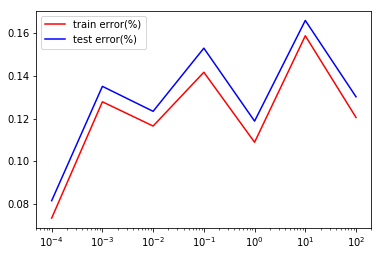

In [18]:
plot_error_curve(C, train_err, test_err)

In [15]:
train_quadratic_kernel_svm()

Test error rate: 0.0194
Train error rate: 0.0
